In [26]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np

In [3]:
df = pd.read_csv("E:\\Make case studies\\Health care\\Hospital in out patient\\in out patient.csv", 
                 delimiter=',')

In [6]:
#EDA using pandas-profiling
profile = ProfileReport(df, explorative=True)
#Saving results to a HTML file
profile.to_file("E:\\Make case studies\\Health care\\Hospital in out patient\\output.html")

# Note : the profiling report outcomes should be considered to understand if the new data is similar to the old data 


In [24]:
df.head()


,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out


In [28]:
# create a list of our conditions
conditions = [
    (df['SOURCE'] =='out'),
    (df['SOURCE'] =='in')
    ]
# create a list of the values we want to assign for each condition
################ PREDICT FOR In = 1 Out = 0
values = ['0', '1']
# create a new column and use np.select to assign values to it using our lists as arguments
df['y'] = np.select(conditions, values)
# display updated DataFrame

df.groupby('y').count()
# convert y into numeric
df['y'] = df.y.astype(np.int64) 
df.dtypes

df["y"].value_counts()


0    2628
1    1784
Name: y, dtype: int64

In [57]:
# create a list of our conditions
conditions = [
    (df['SEX'] =='F'),
    (df['SEX'] =='M')
    ]
# create a list of the values we want to assign for each condition

values = ['0', '1']
# create a new column and use np.select to assign values to it using our lists as arguments
df['gender'] = np.select(conditions, values)
# display updated DataFrame
df.head()
# convert y into numeric
df['gender'] = df.gender.astype(np.int64) 
df.dtypes

df["gender"].value_counts()


1    2290
0    2122
Name: gender, dtype: int64

In [58]:
# check for missing values
df4= df
df4.isnull().sum()


HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
y               0
gender          0
dtype: int64

In [59]:
# code to drop missing values - not required in this data set
limitPer = len(df4) * .80
df4 = df4.dropna(thresh=limitPer, axis=1)
df4["y"].value_counts()

0    2628
1    1784
Name: y, dtype: int64

In [60]:


numeric_cols = list(df4.dtypes[df4.dtypes != 'object'].index)

numeric_cols
#df4.loc[:,numeric_cols] = scaler.fit_transform(df4.loc[:,numeric_cols])

#df4.shape

['HAEMATOCRIT',
 'HAEMOGLOBINS',
 'ERYTHROCYTE',
 'LEUCOCYTE',
 'THROMBOCYTE',
 'MCH',
 'MCHC',
 'MCV',
 'AGE',
 'y',
 'gender']

In [61]:
# Remove column name 'A'
df5=df4.drop(['SEX','SOURCE'], axis=1)
df5.head()


,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,y,gender
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,0,0
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,0,0
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,0,0
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,0,0
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,0,1


In [66]:
#split into x, y
# do for x

df5y = df5['y']

x_data = df5.drop('y', axis = 1)

In [67]:


from sklearn.preprocessing import StandardScaler
  
# Creating an instance of the sklearn.preprocessing.MinMaxScaler()
scaler = StandardScaler()# z score
  
model = scaler.fit(x_data)
scaled_df = model.transform(x_data.to_numpy(), )
scaled_df
df_scaled = pd.DataFrame(scaled_df, columns=['HAEMATOCRIT',
                                              'HAEMOGLOBINS',
                                              'ERYTHROCYTE',
                                              'LEUCOCYTE',
                                              'THROMBOCYTE',
                                              'MCH',
                                              'MCHC',
                                              'MCV',
                                              'AGE',
                                              'gender'])
df_scaled.head()


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,gender
0,-0.518519,-0.452826,0.138698,-0.479078,0.460475,-1.060757,0.209160,-1.328742,-2.09982,-1.038831
1,0.887549,0.989713,1.082573,0.788634,0.671077,-0.274928,0.534754,-0.570539,-2.09982,-1.038831
2,-0.786341,-0.693249,0.253494,0.887673,0.416600,-1.659484,0.290558,-2.028621,-2.09982,-1.038831
3,0.151037,0.460782,0.559615,0.352858,0.951878,-0.274928,1.348738,-0.891317,-2.09982,-1.038831
4,-1.221553,-1.366434,-0.397014,2.650584,0.662302,-1.809166,-1.093215,-1.693263,-2.09982,0.962620


In [68]:
df5x =df_scaled
df5x.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,gender
0,-0.518519,-0.452826,0.138698,-0.479078,0.460475,-1.060757,0.209160,-1.328742,-2.09982,-1.038831
1,0.887549,0.989713,1.082573,0.788634,0.671077,-0.274928,0.534754,-0.570539,-2.09982,-1.038831
2,-0.786341,-0.693249,0.253494,0.887673,0.416600,-1.659484,0.290558,-2.028621,-2.09982,-1.038831
3,0.151037,0.460782,0.559615,0.352858,0.951878,-0.274928,1.348738,-0.891317,-2.09982,-1.038831
4,-1.221553,-1.366434,-0.397014,2.650584,0.662302,-1.809166,-1.093215,-1.693263,-2.09982,0.962620


In [70]:
from sklearn.model_selection import train_test_split

x_train_1, x_test, y_train_1, y_test = train_test_split(df5x, df5y, test_size = 0.3)

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
columns = x_train_1.columns

os_data_x,os_data_y=os.fit_sample(x_train_1, y_train_1)

os_data_x = pd.DataFrame(data=os_data_x,columns=columns )

os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data 
# Out is 0 ; In is 1 

print("length of oversampled data is ",len(os_data_x))
print("Number of Out in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of In",len(os_data_y[os_data_y['y']==1]))
print("Proportion of Out data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_x))
print("Proportion of In data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_x))

  
os_data_y["y"].value_counts()

length of oversampled data is  3730
Number of Out in oversampled data 1865
Number of In 1865
Proportion of Out data in oversampled data is  0.5
Proportion of In data in oversampled data is  0.5


1    1865
0    1865
Name: y, dtype: int64

In [71]:
x_train = os_data_x
y_train = os_data_y

In [72]:
# classification model 
#Decision Tree both for Regression and Classification
#Decision Tree is a Supervised Machine Learning
#the Decision Tree building is determined by:
###The splitting criterion;
###The stopping criterion;
###The method for handling missing values;
###The Pruning method.

#########Decision Trees can handle missing values
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [73]:
# Calculating Gini Impurity of a Pandas DataFrame Column
def gini_impurity(column):
    impurity = 1
    counters = Counter(column)
    for value in column.unique():
        impurity -= (counters[value] / len(column)) ** 2

    return impurity

In [75]:
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

clf_tree.fit(x_train, y_train)


y_train["y"].value_counts()
#%pip install mlxtend

1    1865
0    1865
Name: y, dtype: int64

In [76]:
# How to Import the DecisionTreeClassifer Class
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier(
    criterion='gini', 
    splitter='best', 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features=None, 
    random_state=None, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    class_weight=None, 
    ccp_alpha=0.0
)

DecisionTreeClassifier()

In [77]:
# Creating Our First Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [87]:
# Making Predictions with Our Model
predictions = clf.predict(x_test)
y_pred_train=clf.predict(x_train)
y_pred_df5=clf.predict(df5x)
print(predictions[:10])


[1 0 0 0 0 1 1 1 1 0]


In [88]:
# Measuring the accuracy of our model
from sklearn.metrics import accuracy_score
print('Accuracy score train  : {:.4f}'.format(accuracy_score(y_train, y_pred_train)))
print('Accuracy score test  : {:.4f}'.format(accuracy_score(y_test, predictions)))
print('Accuracy score df5  : {:.4f}'.format(accuracy_score(df5y, y_pred_df5)))


Accuracy score train  : 1.0000
Accuracy score test  : 0.6488
Accuracy score df5  : 0.8946


In [99]:
# Creating a dictionary of parameters to use in GridSearchCV
from sklearn.model_selection import GridSearchCV

params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

clf1 = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

clf1.fit(x_train, y_train)
print(clf1.best_params_)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
{'criterion': 'entropy', 'max_depth': None, 'max_features': 0.8, 'splitter': 'random'}


In [90]:
# The best parameters
{
    'criterion': 'entropy', 
    'max_depth': 5, 
    'max_features': 0.8, 
    'splitter': 'best'
}

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 0.8,
 'splitter': 'best'}

In [100]:
clf1 = DecisionTreeClassifier(max_depth=4, criterion='entropy', max_features=0.8, splitter='best')
clf1.fit(x_train, y_train)
predictions = clf1.predict(x_test)
print(accuracy_score(y_test, predictions))

0.6978851963746223


<ipython-input-101-000538d6d041>:23: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



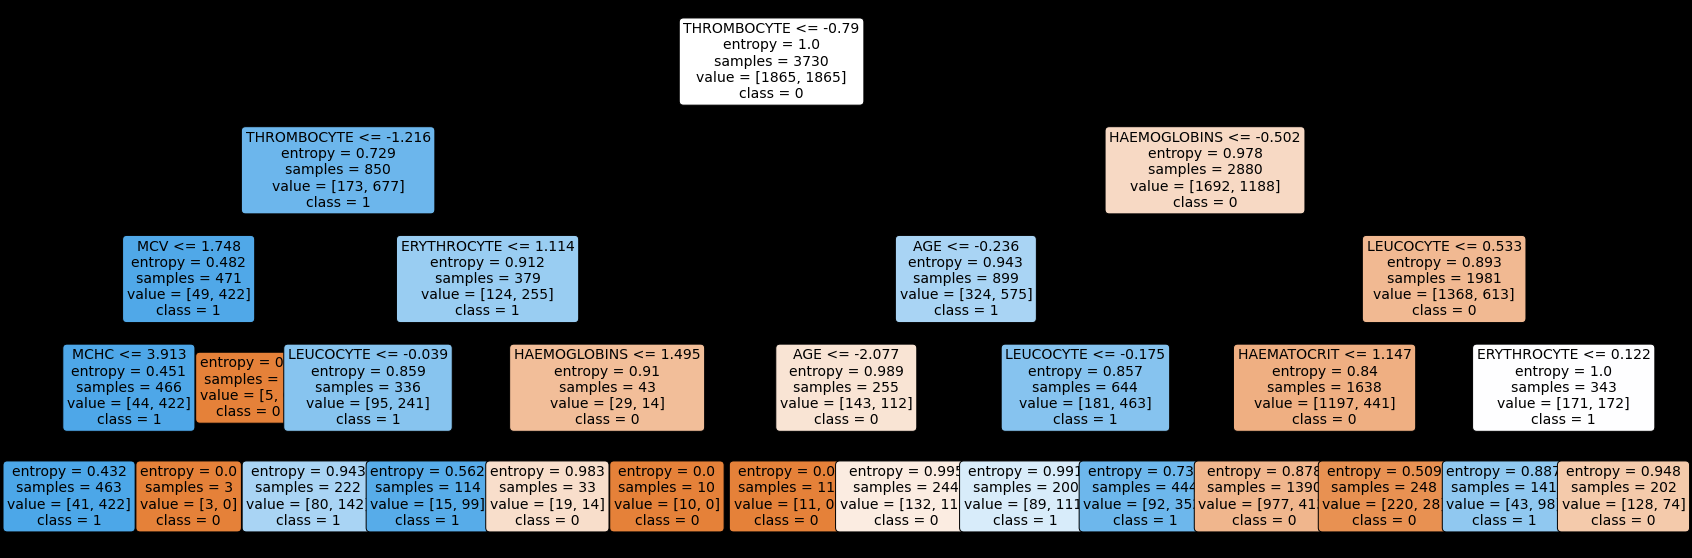

In [101]:
#As a Tree Diagram
feature_names = df5x.columns

labels = df5y.unique().astype('str')
from sklearn import tree

import matplotlib.pyplot as plt

plt.figure(figsize=(30,10), facecolor ='k')

a = tree.plot_tree(clf1,

                   feature_names = feature_names,

                   class_names = labels,

                   rounded = True,

                   filled = True,

                   fontsize=14)

plt.show()

In [102]:
#As a Text-Based Diagram
from sklearn.tree import export_text

tree_rules = export_text(clf1,

                        feature_names = list(feature_names),
                        decimals=2, 
                        show_weights=True)

print(tree_rules)

|--- THROMBOCYTE <= -0.79
|   |--- THROMBOCYTE <= -1.22
|   |   |--- MCV <= 1.75
|   |   |   |--- MCHC <= 3.91
|   |   |   |   |--- weights: [41.00, 422.00] class: 1
|   |   |   |--- MCHC >  3.91
|   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |--- MCV >  1.75
|   |   |   |--- weights: [5.00, 0.00] class: 0
|   |--- THROMBOCYTE >  -1.22
|   |   |--- ERYTHROCYTE <= 1.11
|   |   |   |--- LEUCOCYTE <= -0.04
|   |   |   |   |--- weights: [80.00, 142.00] class: 1
|   |   |   |--- LEUCOCYTE >  -0.04
|   |   |   |   |--- weights: [15.00, 99.00] class: 1
|   |   |--- ERYTHROCYTE >  1.11
|   |   |   |--- HAEMOGLOBINS <= 1.49
|   |   |   |   |--- weights: [19.00, 14.00] class: 0
|   |   |   |--- HAEMOGLOBINS >  1.49
|   |   |   |   |--- weights: [10.00, 0.00] class: 0
|--- THROMBOCYTE >  -0.79
|   |--- HAEMOGLOBINS <= -0.50
|   |   |--- AGE <= -0.24
|   |   |   |--- AGE <= -2.08
|   |   |   |   |--- weights: [11.00, 0.00] class: 0
|   |   |   |--- AGE >  -2.08
|   |   |   |   |--- we

In [103]:
from sklearn import metrics

import seaborn as sns

import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(y_test,  

                                        test_pred_decision_tree)

matrix_df = pd.DataFrame(confusion_matrix)

#ax = plt.axes()

#sns.set(font_scale=1.3)

#plt.figure(figsize=(10,7))

#sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")

#ax.set_title('Confusion Matrix - Decision Tree')

#ax.set_xlabel("Predicted label", fontsize =15)

#ax.set_xticklabels(['']+labels)

#ax.set_ylabel("True Label", fontsize=15)

#ax.set_yticklabels(list(labels), rotation = 0)

#plt.show()
matrix_df

,0,1
0,590,173
1,225,336


In [104]:
# from df5 - this data was divided into df5x and df5y
# this is validating on the total data 

clf1.fit(df5x, df5y)
predictions = clf1.predict(df5x)
print(accuracy_score(df5y, predictions))


0.7379873073436083


In [105]:
# store the predicted probabilities for class 1 

y_pred_train = clf.predict_proba(x_train)[:, 1] # Model classification
y_pred_test = clf.predict_proba(x_test)[:, 1] # Model classification
y_pred_data = clf.predict_proba(df5x)[:, 1] # Model classification

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_train, y_pred_train)

print('ROC AUC_Model_train : {:.4f}'.format(ROC_AUC))

ROC_AUC = roc_auc_score(y_test, y_pred_test)

print('ROC AUC_Model_test : {:.4f}'.format(ROC_AUC))

ROC_AUC = roc_auc_score(df5y, y_pred_data)

print('ROC AUC_Model_df5 : {:.4f}'.format(ROC_AUC))

ROC AUC_Model_train : 0.7802
ROC AUC_Model_test : 0.7723
ROC AUC_Model_df6 : 0.7820


In [106]:
# store the predicted probabilities for class 1 

y_pred_train = clf1.predict_proba(x_train)[:, 1] # Model classification
y_pred_test = clf1.predict_proba(x_test)[:, 1] # Model classification
y_pred_data = clf1.predict_proba(df5x)[:, 1] # Model classification

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_train, y_pred_train)

print('ROC AUC_Model1_train : {:.4f}'.format(ROC_AUC))

ROC_AUC = roc_auc_score(y_test, y_pred_test)

print('ROC AUC_Model1_test : {:.4f}'.format(ROC_AUC))

ROC_AUC = roc_auc_score(df5y, y_pred_data)

print('ROC AUC_Model1_df5 : {:.4f}'.format(ROC_AUC))

ROC AUC_Model1_train : 0.7718
ROC AUC_Model1_test : 0.7601
ROC AUC_Model1_df5 : 0.7710


In [ ]:
# choose model clf 

In [107]:
predictions = clf.predict(df5x)
probabilities =clf.predict_proba(df5x)

print (predictions)
print (probabilities)

[0 0 1 ... 0 1 0]
[[0.71174377 0.28825623]
 [0.68       0.32      ]
 [0.47507331 0.52492669]
 ...
 [0.71174377 0.28825623]
 [0.28767123 0.71232877]
 [0.71174377 0.28825623]]


In [108]:
#import pandas as pd
#import numpy as np
x_data1 = pd.DataFrame(df5x)
x_data1['predictions'] = predictions.tolist()
x_data1['probabilities'] = probabilities.tolist()

#column_series1 = pd.Series(predictions)
#column_series2 = pd.Series(probabilities)
x_data1.head()

x_data1['prob_1'] = x_data1['probabilities'].str[0]
x_data1['prob_0'] = x_data1['probabilities'].str[1]

#x_data1.dtypes
x_data1.head()
# divide Prbabilities into 2 - for 0 and for 1 - column data = [0.2119205298013245, 0.788079470198675
#x_data1['probabilities'].str.split(' ', n = 1, expand=True)

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,gender,predictions,probabilities,prob_1,prob_0
0,-0.518519,-0.452826,0.138698,-0.479078,0.460475,-1.060757,0.209160,-1.328742,-2.09982,-1.038831,0,"[0.7117437722419929, 0.28825622775800713]",0.711744,0.288256
1,0.887549,0.989713,1.082573,0.788634,0.671077,-0.274928,0.534754,-0.570539,-2.09982,-1.038831,0,"[0.68, 0.32]",0.680000,0.320000
2,-0.786341,-0.693249,0.253494,0.887673,0.416600,-1.659484,0.290558,-2.028621,-2.09982,-1.038831,1,"[0.4750733137829912, 0.5249266862170088]",0.475073,0.524927
3,0.151037,0.460782,0.559615,0.352858,0.951878,-0.274928,1.348738,-0.891317,-2.09982,-1.038831,0,"[0.772239263803681, 0.227760736196319]",0.772239,0.227761
4,-1.221553,-1.366434,-0.397014,2.650584,0.662302,-1.809166,-1.093215,-1.693263,-2.09982,0.962620,1,"[0.2876712328767123, 0.7123287671232876]",0.287671,0.712329


In [109]:
x_data1.to_csv('E:\\Make case studies\\Health care\\Hospital in out patient\\Data_with_Prediction.csv', index = True)